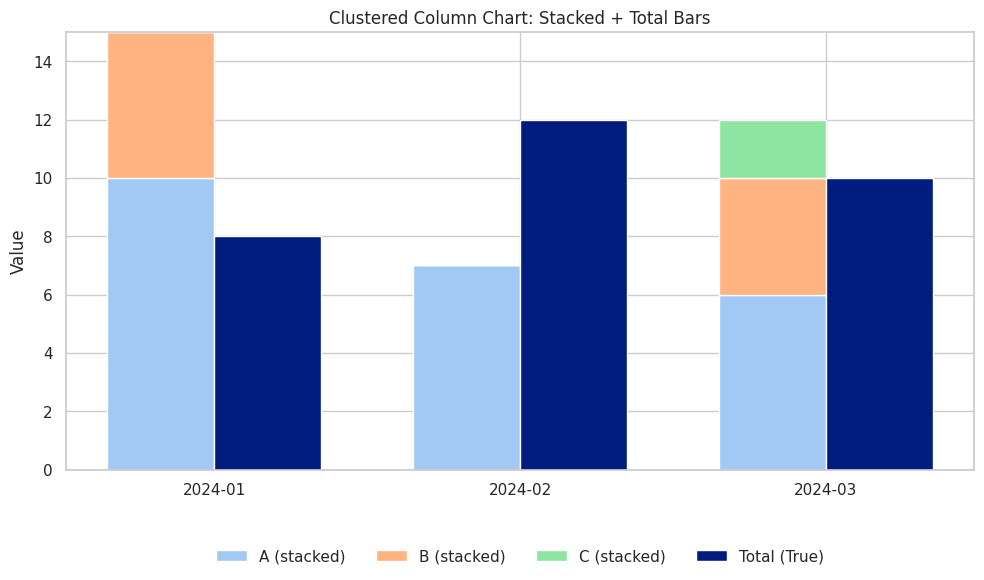

In [30]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Set Seaborn theme
sns.set_theme(style='whitegrid')

# Sample data
data = pd.DataFrame({
    'date': ['2024-01', '2024-01', '2024-01', '2024-02', '2024-02', '2024-03', '2024-03', '2024-03', '2024-03'],
    'condition': [False, False, True, False, True, False, False, False, True],
    'category': ['A', 'B', 'Total', 'A', 'Total', 'A', 'B', 'C', 'Total'],
    'value': [10, 5, 8, 7, 12, 6, 4, 2, 10]
})

# Define time periods
all_dates = sorted(data['date'].unique())
x = range(len(all_dates))
bar_width = 0.35

# Separate condition types
false_data = data[~data['condition']]
true_data = data[data['condition']]

# Pivot table for stacked bars
stacked_pivot = false_data.pivot_table(
    index='date',
    columns='category',
    values='value',
    aggfunc='sum',
    fill_value=0
).reindex(all_dates, fill_value=0)

# True totals
true_totals = true_data.groupby('date')['value'].sum().reindex(all_dates, fill_value=0)

# Plot with Seaborn style but Matplotlib logic
fig, ax = plt.subplots(figsize=(10, 6))

# Get colors from seaborn palette
palette = sns.color_palette("pastel", n_colors=len(stacked_pivot.columns))
category_colors = dict(zip(stacked_pivot.columns, palette))

# X positions
x_stacked = [i - bar_width/2 for i in x]
x_total = [i + bar_width/2 for i in x]

# Plot stacked bars
bottom = [0] * len(all_dates)
for category in stacked_pivot.columns:
    values = stacked_pivot[category].tolist()
    ax.bar(
        x_stacked,
        values,
        bottom=bottom,
        width=bar_width,
        label=f'{category} (stacked)',
        color=category_colors[category]
    )
    bottom = [b + v for b, v in zip(bottom, values)]

# Plot total bars
ax.bar(
    x_total,
    true_totals.tolist(),
    width=bar_width,
    label='Total (True)',
    color=sns.color_palette("dark")[0]
)

# Final formatting
ax.set_xticks(x)
ax.set_xticklabels(all_dates)
ax.set_ylabel('Value')
ax.set_title('Clustered Column Chart: Stacked + Total Bars')

# Move legend to the bottom
ax.legend(loc='upper center', bbox_to_anchor=(0.5, -0.15), ncol=4, frameon=False)

plt.tight_layout()
plt.show()


In [ ]:
def my_function(arg1, arg2, arg3="default_value"):
    print(f"arg1: {arg1}")
    print(f"arg2: {arg2}")
    print(f"arg3: {arg3}")

# Create a dictionary of arguments
args_dict = {
    "arg1": "value_for_arg1",
    "arg2": 123,
    "arg3": "new_default",
    "another" : 
}

# Call the function, unpacking the dictionary as keyword arguments
my_function(**args_dict)

# You can also mix direct arguments with unpacked dictionary arguments
another_dict = {
    "arg2": 456
}
my_function(arg1="direct_value", **another_dict)

arg1: value_for_arg1
arg2: 123
arg3: new_default
arg1: direct_value
arg2: 456
arg3: default_value


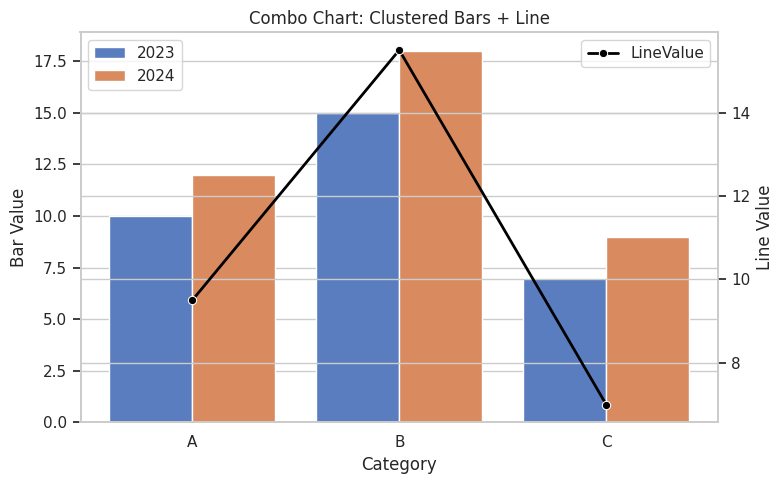

In [9]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Sample data
data = pd.DataFrame({
    'Category': ['A', 'B', 'C', 'A', 'B', 'C'],
    'Group': ['2023', '2023', '2023', '2024', '2024', '2024'],
    'Value': [10, 15, 7, 12, 18, 9],
    'LineValue': [8, 14, 6, 11, 17, 8]
})

# Pivot for bar plot
bar_data = data.pivot(index='Category', columns='Group', values='Value').reset_index()

# Set figure and axis
fig, ax1 = plt.subplots(figsize=(8, 5))

# Clustered barplot with seaborn
sns.barplot(data=data, x='Category', y='Value', hue='Group', ax=ax1, palette='muted')

# Calculate line values (averages across groups for each category here, you can customize)
line_data = data.groupby('Category')['LineValue'].mean().reset_index()

# Plot line on same axis
ax2 = ax1.twinx()
sns.lineplot(data=line_data, x='Category', y='LineValue', ax=ax2, marker='o', color='black', linewidth=2, label='LineValue')

# Align legends
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')

# Labels and title
ax1.set_ylabel("Bar Value")
ax2.set_ylabel("Line Value")
plt.title("Combo Chart: Clustered Bars + Line")

plt.tight_layout()
plt.show()


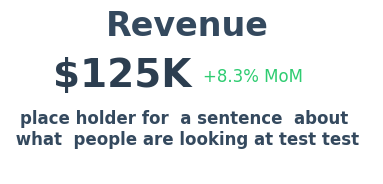

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set theme
sns.set_theme(style="white")

# KPI values
kpi_title = "Revenue"
kpi_value = "$125K"
kpi_delta = "+8.3% MoM"
kpi_text = "place holder for  a sentence  about \n what  people are looking at test test "
delta_color = "#2ecc71"  # green for positive, red if negative

# Plot setup
fig, ax = plt.subplots(figsize=(4, 2))
fig.patch.set_facecolor('white')
ax.axis('off')  # Hide axes

# Add text
ax.text(0, 0.95, kpi_title, fontsize=24, fontweight='bold', color='#34495e',  ha= 'center')
ax.text(-.35, 0.6, kpi_value, fontsize=28, fontweight='bold', color='#2c3e50', ha= 'center')

ax.text(.35, 0.65, kpi_delta, fontsize=12, color=delta_color, ha= 'center')
ax.text(.0, .2, kpi_text, fontsize=12, fontweight='bold', color='#34495e', ha= 'center')

# Optional: add border or shadow for card effect
for spine in ax.spines.values():
    spine.set_visible(False)

plt.tight_layout()
plt.show()
